In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict
from cymesh.mesh import Mesh

In [13]:
mesh = Mesh.from_obj('cup.obj')

In [50]:
def grow_fontier(nodes, seen):
    frontier = []
    for node in nodes:
        for neighbor in node.neighbors():
            if neighbor not in seen:
                frontier.append(neighbor)
                seen.add(neighbor)
    return frontier
    
def water_held(mesh):
    mesh.calculateNormals()
    water_line = 0
    seen = set()
    
    for vert in sorted(mesh.verts, key=lambda vert: vert.p[1]):
        if vert in seen:
            continue
        else:
            derp = set([ vert ])
            frontier = [ vert ]
            water_level = vert.p[1]
            
            while frontier:
                for vert2 in frontier:
                    if vert2.p[1] >= water_level:
                        derp.add(vert2)
                        water_level = vert2.p[1]
                
                frontier = grow_fontier(frontier, seen)
                frontier = sorted(frontier, key=lambda vert: vert.p[1])
            print(len(derp))

water_held(mesh)
print(len(mesh.verts))

23
36


In [36]:
def make_grid(mesh, width=1.0):
    grid = defaultdict(int)
    
    bbox = mesh.boundingBox()
    
    nx = int((bbox[1] - bbox[0])/width) + 2
    nz = int((bbox[5] - bbox[4])/width) + 2
    print(nx, nz)
    grid = np.zeros((nx, nz))
    
    for vert in mesh.verts:
        x = int((vert.p[0]-bbox[0]) / width)
        z = int((vert.p[2]-bbox[4]) / width)
        assert 0 <= x < nx
        assert 0 <= z < nz
        grid[x, z] = max(grid[x, z], vert.p[1])
        
    return grid

In [40]:
grid = make_grid(mesh, 5)

18 16


In [41]:
grid.max()

71.960785

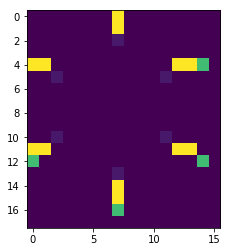

In [43]:
plt.imshow(grid)